# Cat and Dog Image Classifier

In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
PATH1 = '/kaggle/input/cats-and-dogs'
PATH2 = '/kaggle/input/cats-and-dogs-image-classification'

train_dir = os.path.join(PATH1, 'train')
validation_dir = os.path.join(PATH1, 'val')
test_dir = os.path.join(PATH2, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = sum([len(files) for r, d, files in os.walk(test_dir)])

# Variables for pre-processing and training.
batch_size = 128
epochs = 100
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [3]:
train_image_generator      = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator       = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
                    train_dir,
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=batch_size,
                    class_mode='binary')

val_data_gen   = validation_image_generator.flow_from_directory(
                    validation_dir,
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=batch_size,
                    class_mode='binary')

test_data_gen  = test_image_generator.flow_from_directory(
                    test_dir,
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=batch_size,
                    classes=['binary'])

Found 275 images belonging to 2 classes.
Found 70 images belonging to 2 classes.
Found 0 images belonging to 1 classes.


In [4]:
from keras.layers import Input
model = Sequential()

# Convolutions
model.add(Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(Conv2D(32, (3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dense layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Optimizer
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [5]:
history = model.fit(
            train_data_gen, #steps_per_epoch=train_steps,
            validation_data=val_data_gen, #validation_steps=val_steps,
            epochs=epochs)

Epoch 1/100
3/3 [==============================] - 6s 601ms/step - loss: 1.3847 - accuracy: 0.3855 - val_loss: 10.0332 - val_accuracy: 0.3429
Epoch 2/100
3/3 [==============================] - 1s 285ms/step - loss: 5.1193 - accuracy: 0.4945 - val_loss: 0.6176 - val_accuracy: 0.6571
Epoch 3/100
3/3 [==============================] - 1s 425ms/step - loss: 1.5732 - accuracy: 0.5200 - val_loss: 1.8403 - val_accuracy: 0.3429
Epoch 4/100
3/3 [==============================] - 1s 320ms/step - loss: 1.3261 - accuracy: 0.3745 - val_loss: 1.0129 - val_accuracy: 0.6571
Epoch 5/100
3/3 [==============================] - 1s 283ms/step - loss: 1.0121 - accuracy: 0.6545 - val_loss: 0.8812 - val_accuracy: 0.6571
Epoch 6/100
3/3 [==============================] - 1s 428ms/step - loss: 0.7720 - accuracy: 0.6545 - val_loss: 0.6859 - val_accuracy: 0.6571
Epoch 7/100
3/3 [==============================] - 1s 423ms/step - loss: 0.6523 - accuracy: 0.6545 - val_loss: 0.6554 - val_accuracy: 0.6571
Epoch 8/100


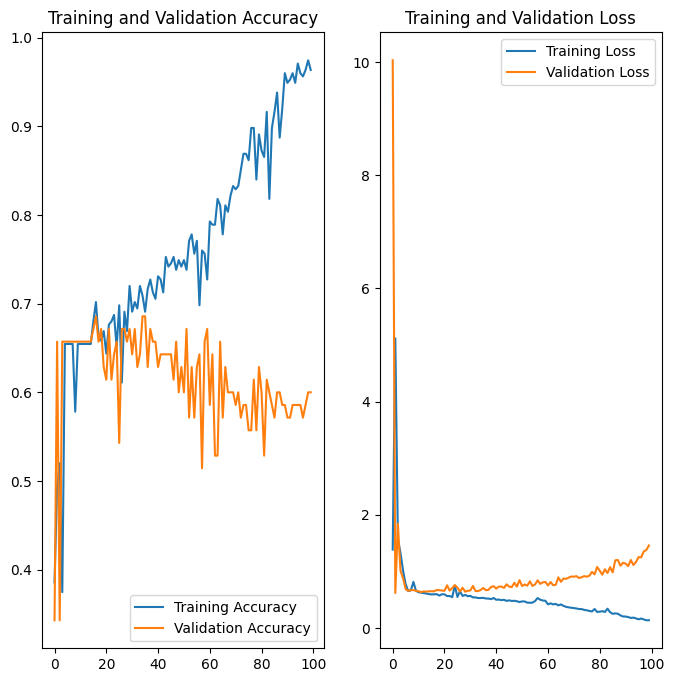

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()